In [6]:
import pandas as pd
from ETL import discovery
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_folder_file = "/Users/yamada/USP/Materias/7 semestre/Mineracao de dados/Celonis Dataset/BPI Challenge 2020 - Prepaid Travel Costs/"
path_folder_bpmn = "/Users/yamada/USP/Materias/7 semestre/Mineracao de dados/Celonis Dataset/BPI Challenge 2020 - Prepaid Travel Costs/"
path_folder_png = "."
results = discovery(path_folder_file,path_folder_bpmn,path_folder_png)

/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 2099/2099 [00:00<00:00, 4800.67it/s]
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/yamada/miniforge3/envs/.env_mineracao/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

Precision - Token replay: 0.12207309105013397


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:01<00:00, 143.50it/s]


Generalization: 0.9097203256128684
Simplicity: 0.5862068965517241


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 1950.06it/s]


Precision - Token replay: 0.958789019115937


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 908.79it/s] 


Generalization: 0.5988575329285628
Simplicity: 0.5238095238095238


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 6123.73it/s]


Precision - Token replay: 0.9821635672865426


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 2681.75it/s]

Generalization: 0.829298658766102
Simplicity: 0.6103896103896105



replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 15461.78it/s]


Precision - Token replay: 0.0


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 853.03it/s]


Generalization: 0.8773091720949231
Simplicity: 0.19407894736842107


replaying log with TBR, completed variants :: 100%|██████████| 903/903 [00:00<00:00, 3872.56it/s]


Precision - Token replay: 1.0


replaying log with TBR, completed variants :: 100%|██████████| 202/202 [00:00<00:00, 387.22it/s]

Generalization: 0.8821865014090176
Simplicity: 0.08978328173374614


In [3]:
results


{'Inductive_Miner': {'Precisao': 0.12207309105013397,
  'Generalizacao': 0.9097203256128684,
  'Simplicidade': 0.5862068965517241},
 'Heuristic_Miner': {'Precisao': 0.958789019115937,
  'Generalizacao': 0.5988575329285628,
  'Simplicidade': 0.5238095238095238},
 'Heuristic_Miner_0.99': {'Precisao': 0.9821635672865426,
  'Generalizacao': 0.829298658766102,
  'Simplicidade': 0.6103896103896105},
 'Alpha': {'Precisao': 0.0,
  'Generalizacao': 0.8773091720949231,
  'Simplicidade': 0.19407894736842107},
 'Alpha_Plus': {'Precisao': 1.0,
  'Generalizacao': 0.8821865014090176,
  'Simplicidade': 0.08978328173374614}}

In [9]:
pd.DataFrame(results)

,Inductive_Miner,Heuristic_Miner,Heuristic_Miner_0.99,Alpha,Alpha_Plus
Precisao,0.122073,0.958789,0.982164,0.000000,1.000000
Generalizacao,0.909720,0.598858,0.829299,0.877309,0.882187
Simplicidade,0.586207,0.523810,0.610390,0.194079,0.089783


(array([0, 1, 2]),
 [Text(0, 0, 'Precisao'),
  Text(1, 0, 'Generalizacao'),
  Text(2, 0, 'Simplicidade')])

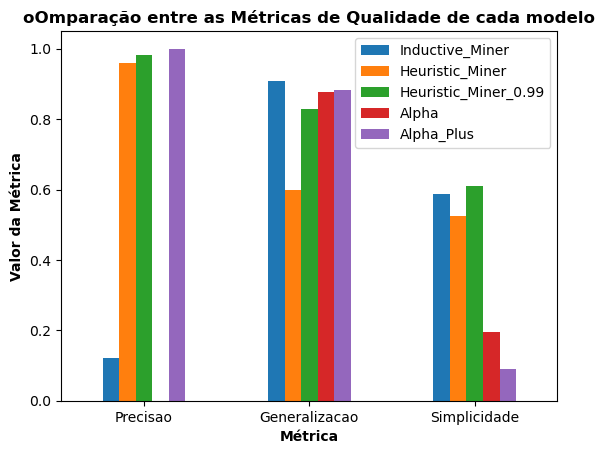

In [8]:
pd.DataFrame(results).plot(kind='bar')
plt.title("oOmparação entre as Métricas de Qualidade de cada modelo",fontdict = {'fontweight':'bold'})
plt.ylabel("Valor da Métrica",fontdict = {'fontweight':'bold'})
plt.xlabel("Métrica",fontdict = {'fontweight':'bold'})
plt.xticks(rotation=0)